## 0. Load Data

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
spotify_songs = pd.read_csv ('/content/drive/MyDrive/DATA ENGINEERING/Music Data/1_spotify_songs.csv')
billboard = pd.read_csv ('/content/drive/MyDrive/DATA ENGINEERING/Music Data/2_billboard.csv')
artist_a = pd.read_csv ('/content/drive/MyDrive/DATA ENGINEERING/Music Data/3_artists.csv')
tracks_a = pd.read_csv ('/content/drive/MyDrive/DATA ENGINEERING/Music Data/3_tracks.csv')
albums_b = pd.read_csv ('/content/drive/MyDrive/DATA ENGINEERING/Music Data/4_albums.csv')
artists_b = pd.read_csv ('/content/drive/MyDrive/DATA ENGINEERING/Music Data/4_artists.csv')

## 1. Data Merge

In [ ]:
# remove duplicate id
artists_b_temp = artists_b.drop(columns=['id'])

# select not duplicated columns
tracks_a = tracks_a[["id","name","artists","id_artists","release_date"]]

In [ ]:
songs = pd.merge(spotify_songs, tracks_a, how = "inner", left_on=['track_id'], right_on = ['id'])
artist = pd.merge(artist_a, artists_b_temp, how = "left", left_on=['name'], right_on = ['art_name']) # use artist ID to match with song 
album = albums_b # use album name to match with songs
# billboard use song name to match

## 2. Check Data Completeness

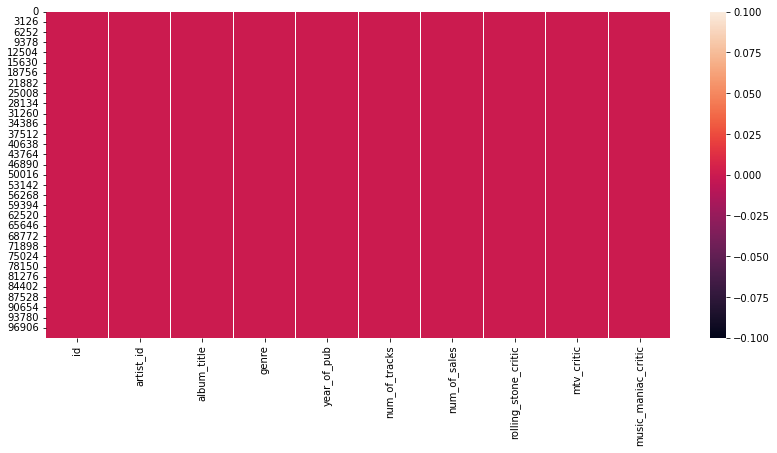

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(album.isnull())

## 3. Analysis

### 3.1 Track

In [ ]:
popular_songs = songs[songs['track_popularity'] > 80]

In [ ]:
popular_songs = popular_songs.drop(columns='track_popularity')

In [ ]:
grand_mean = popular_songs.describe().loc['mean'].tolist()

In [ ]:
popular_songs.describe().loc['mean']

danceability             0.705802
energy                   0.638817
key                      5.614943
loudness                -5.975488
mode                     0.543514
speechiness              0.119640
acousticness             0.211465
instrumentalness         0.012338
liveness                 0.164574
valence                  0.524045
tempo                  119.357085
duration_ms         208755.161741
Name: mean, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa75fe32d0>,
      dtype=object)

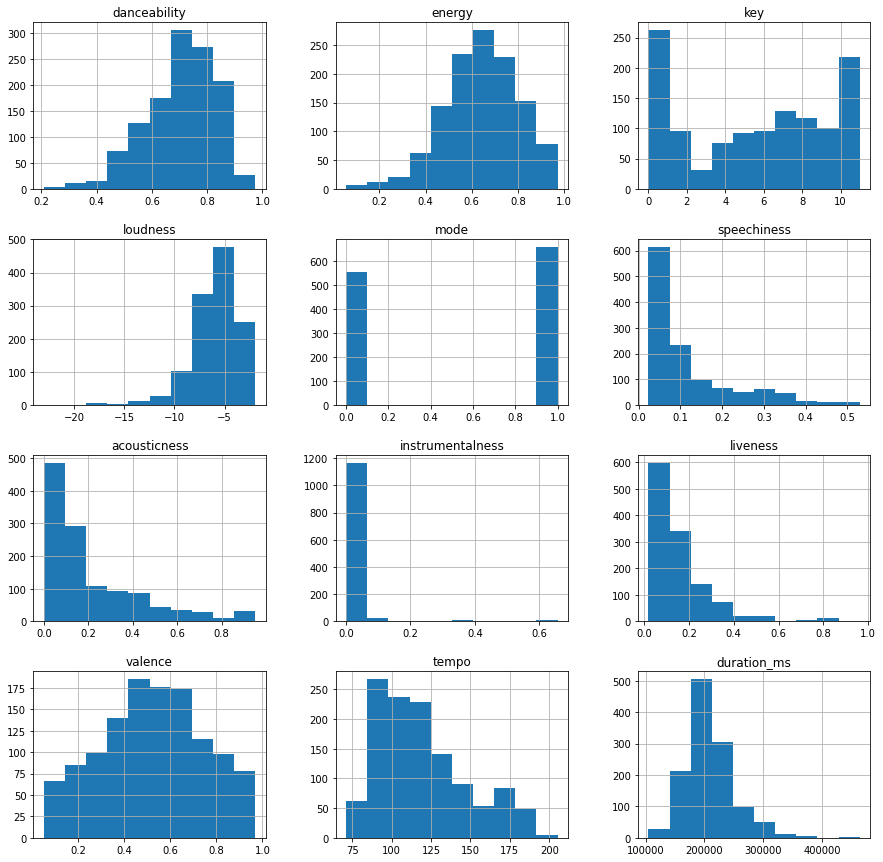

In [ ]:
popular_songs.iloc[2:,].hist(figsize=(15,15))

In [ ]:
grand_mean.insert(0, 'Grand mean')

In [ ]:
grand_mean

['Grand mean',
 0.7058021346469631,
 0.6388168308702806,
 5.614942528735632,
 -5.97548768472906,
 0.5435139573070608,
 0.11963957307060746,
 0.21146488013136314,
 0.012338125229885043,
 0.16457364532019744,
 0.5240454844006565,
 119.35708456486036]

In [ ]:
features = ['energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [ ]:
result = popular_songs.groupby('playlist_genre', as_index=False)['danceability'].mean()
for a in features:
  temp = popular_songs.groupby('playlist_genre', as_index=False)[a].mean()
  result[a] = temp[a]


In [ ]:
result

,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,edm,0.698542,0.647675,6.108333,-5.832617,0.558333,0.098312,0.216691,0.015060,0.186074,0.540836,115.718292
1,latin,0.723386,0.662083,5.775811,-5.394985,0.581121,0.119098,0.229463,0.010816,0.160833,0.576593,119.071245
2,pop,0.686796,0.658670,5.707547,-5.735057,0.540881,0.096259,0.208686,0.015470,0.153601,0.523566,119.057003
3,r&b,0.700675,0.582257,5.164659,-6.638129,0.534137,0.132036,0.244868,0.012069,0.167197,0.461404,118.261470
4,rap,0.766432,0.607302,5.510791,-6.368266,0.424460,0.193766,0.149184,0.001914,0.177278,0.463622,125.241734
5,rock,0.588887,0.699208,5.301887,-7.311302,0.641509,0.059028,0.107597,0.025725,0.160008,0.605566,120.938642


In [ ]:
result.loc[6] = grand_mean

In [ ]:
result

,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,edm,0.698542,0.647675,6.108333,-5.832617,0.558333,0.098312,0.216691,0.015060,0.186074,0.540836,115.718292
1,latin,0.723386,0.662083,5.775811,-5.394985,0.581121,0.119098,0.229463,0.010816,0.160833,0.576593,119.071245
2,pop,0.686796,0.658670,5.707547,-5.735057,0.540881,0.096259,0.208686,0.015470,0.153601,0.523566,119.057003
3,r&b,0.700675,0.582257,5.164659,-6.638129,0.534137,0.132036,0.244868,0.012069,0.167197,0.461404,118.261470
4,rap,0.766432,0.607302,5.510791,-6.368266,0.424460,0.193766,0.149184,0.001914,0.177278,0.463622,125.241734
5,rock,0.588887,0.699208,5.301887,-7.311302,0.641509,0.059028,0.107597,0.025725,0.160008,0.605566,120.938642
6,Grand mean,0.705802,0.638817,5.614943,-5.975488,0.543514,0.119640,0.211465,0.012338,0.164574,0.524045,119.357085


In [ ]:
from random import randint

color = []
n = 11

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

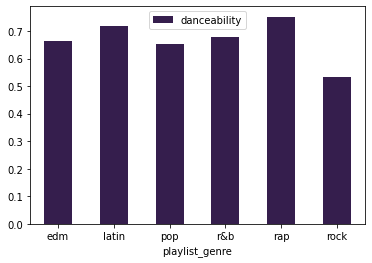

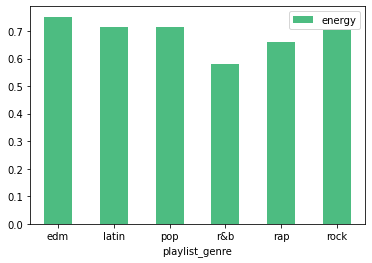

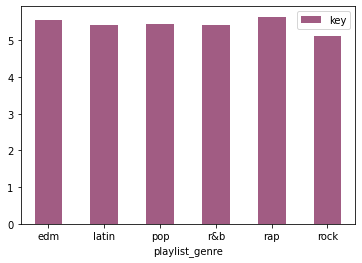

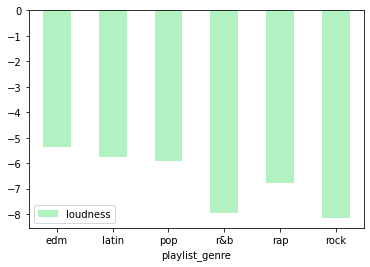

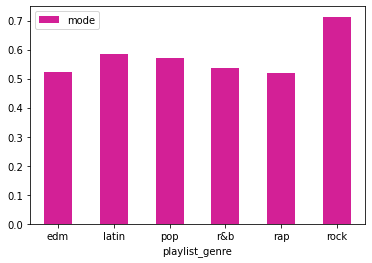

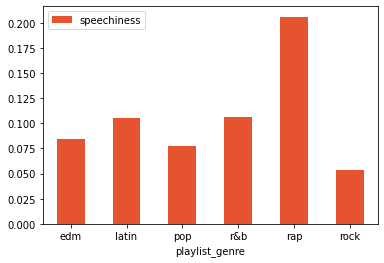

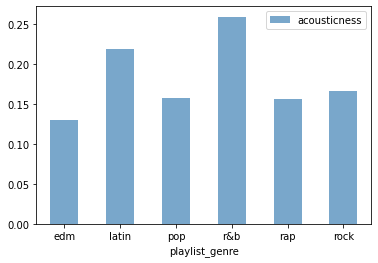

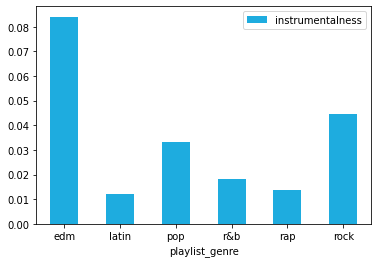

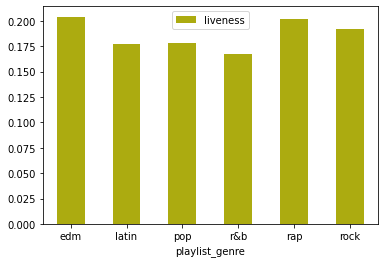

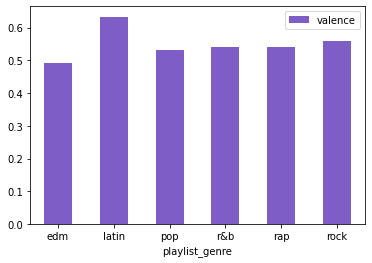

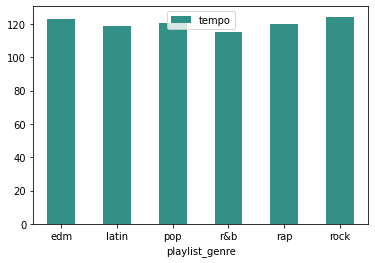

In [ ]:
i = 0
for a in list(result.columns[1:,]):
  result.plot.bar(x='playlist_genre', y=a, rot=0, color=color[i])
  i = i+1

#result.plot.bar(x='playlist_genre', y='danceability', rot=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Track Popularity')

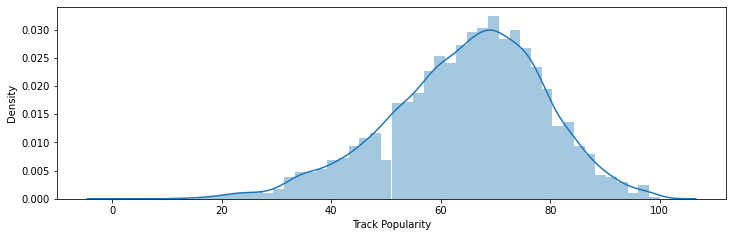

In [ ]:
# Check the distribution of the 'track_popularity' column
plt.figure(figsize=(12,12))
plt.subplot(3, 1, 1); sns.distplot(songs['track_popularity'])
plt.xlabel('Track Popularity')

(array([1.000e+00, 3.400e+01, 1.290e+02, 5.320e+02, 9.540e+02, 2.093e+03,
        2.981e+03, 2.656e+03, 9.990e+02, 2.190e+02]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

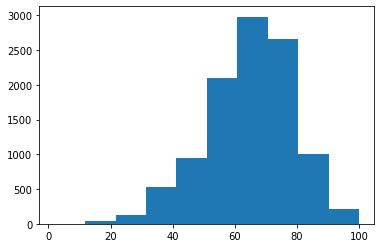

In [ ]:
plt.hist(songs['track_popularity'])

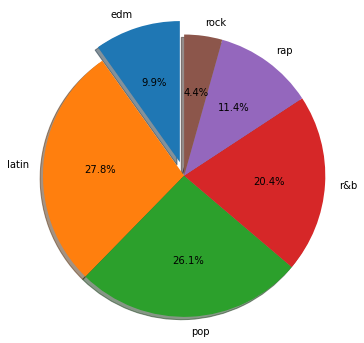

In [ ]:
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(counts['track_id'], explode=explode, labels=counts['playlist_genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
fig = px.pie(genres, values='track_popularity', names='playlist_genre', title='Most popular music genre')
fig.show()

In [ ]:
# select the songs with popularity greater than 80 and 
# plot the percentage of the songs' corresponding genre 
songs[songs['track_popularity'] > 80]['playlist_genre'].unique()

array(['pop', 'latin', 'r&b', 'edm', 'rap', 'rock'], dtype=object)

In [ ]:
genres = songs[songs['track_popularity'] > 80]

In [ ]:
counts = genres.groupby('playlist_genre', as_index=False).count()

### 3.2 Artists

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Popularity')

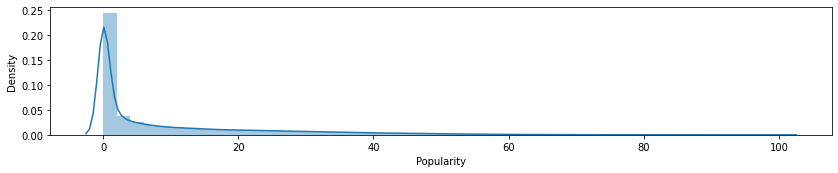

In [ ]:
# Check the distribution of the 'popularity' column
plt.figure(figsize=(14,8))
plt.subplot(3, 1, 1); sns.distplot(artist['popularity'])
plt.xlabel('Popularity')

(array([7.66684e+05, 1.34986e+05, 9.12690e+04, 5.99950e+04, 3.36550e+04,
        1.54470e+04, 5.66700e+03, 1.58900e+03, 3.69000e+02, 5.10000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

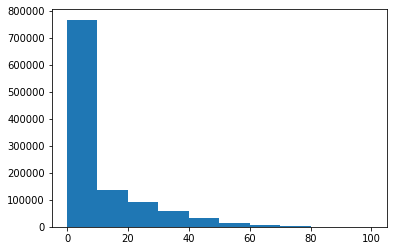

In [ ]:
plt.hist(artist['popularity'])

In [ ]:
top_artist = artist.sort_values(by='followers', ascending=False)

In [ ]:
top_artist = top10_artist[['name', 'followers']].head(20)

In [ ]:
top_artist

,name,followers
145395,Ed Sheeran,78900234.0
145742,Ariana Grande,61301006.0
315958,Drake,54416812.0
145738,Justin Bieber,44606973.0
145745,Eminem,43747833.0
315790,Rihanna,42244011.0
127810,Billie Eilish,41792604.0
127490,Taylor Swift,38869193.0
127491,Imagine Dragons,33665795.0
145753,Queen,33483326.0


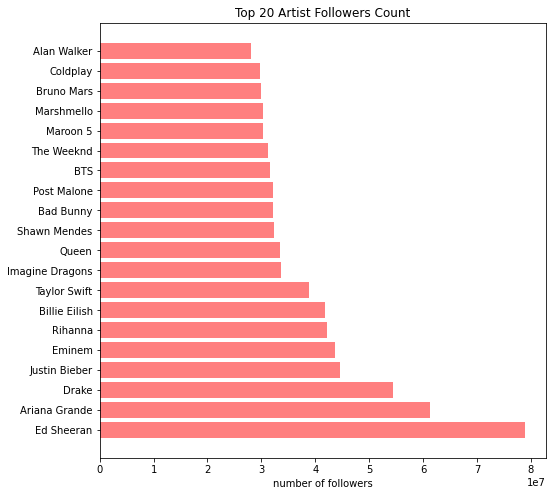

In [ ]:
y_pos = np.arange(len(top_artist['name']))
plt.figure(figsize=(8, 8))
plt.barh(y_pos, top_artist['followers'], align='center', alpha=0.5, color='red')
plt.yticks(y_pos, top_artist['name'])
plt.xlabel('number of followers')
plt.title("Top 20 Artist Followers Count")

plt.show()

### 3.3 Album

In [ ]:
album.head()

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0


In [ ]:
top_album = album.sort_values(by='num_of_sales', ascending=False)

In [ ]:
top_sale_album = album.groupby('genre', as_index=False)['num_of_sales'].mean().sort_values(by='num_of_sales', ascending=False).head(10)

In [ ]:
top_sale_album['num_of_sales'] = top_sale_album['num_of_sales'].astype(int)

In [ ]:
top_sale_album

,genre,num_of_sales
15,Heavy Metal,512907
4,Boy Band,510635
25,Metal,508603
19,J-Rock,507429
14,Hard Rock,506168
1,Ambient,505920
30,Punk,505447
27,Pop,505046
12,Folk,504939
36,Unplugged,504863


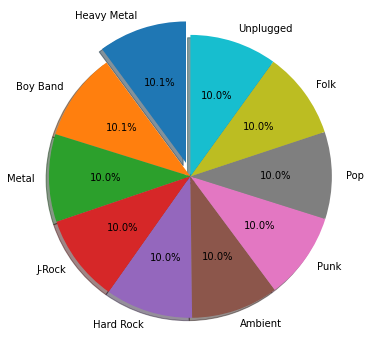

In [ ]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(top_sale_album['num_of_sales'], explode=explode, labels=top_sale_album['genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [ ]:
top_album[['album_title','genre', 'rolling_stone_critic']][0:19]

,album_title,genre,rolling_stone_critic
42777,Engineer Minangkabau,Pop,5.0
84758,Charming Jordan,Indie,5.0
17596,Ice Better have,Indie,5.0
26734,American Boy Unfair The Asleep,Indie,5.0
84748,My Best Chemist Hungry,J-Rock,5.0
52969,Kittens in My Heart Bulls In My Garden,Western,5.0
31583,Under the Fiat Of Love Find,Latino,5.0
44338,Steel Fierce Kia Hills,Compilation,5.0
26737,Bertie,Heavy Metal,5.0
84736,Jollar Secretive Falling Additional,Boy Band,5.0


In [ ]:
fig = px.pie(album, values='rolling_stone_critic', names='genre', title='Most popular album genre')
fig.show()

### 3.4 Billboard

In [ ]:
billboard.head()

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
0,1,Butter,BTS,1.0,1,7,2021-07-17
1,2,Good 4 U,Olivia Rodrigo,2.0,1,8,2021-07-17
2,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,40,2021-07-17
3,4,Kiss Me More,Doja Cat Featuring SZA,3.0,3,13,2021-07-17
4,5,Montero (Call Me By Your Name),Lil Nas X,8.0,1,15,2021-07-17


In [ ]:
# top 10 singers with most count for weeks-on-board
tmp1 = billboard.groupby('artist', as_index=False)['weeks-on-board'].sum().sort_values(by='weeks-on-board', ascending=False).head(10)

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])


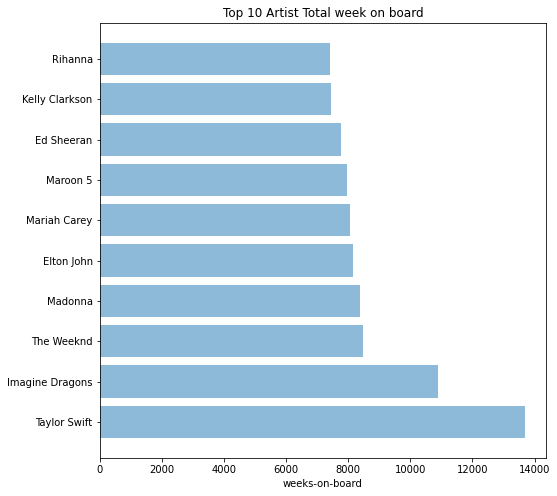

In [ ]:
y_pos = np.arange(len(tmp1['artist']))
plt.figure(figsize=(8, 8))
plt.barh(y_pos, tmp1['weeks-on-board'], align='center', alpha=0.5)
plt.yticks(y_pos, tmp1['artist'])
plt.xlabel('weeks-on-board')
plt.title("Top 10 Artist Total Weeks on Board")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Weeks-on-board')

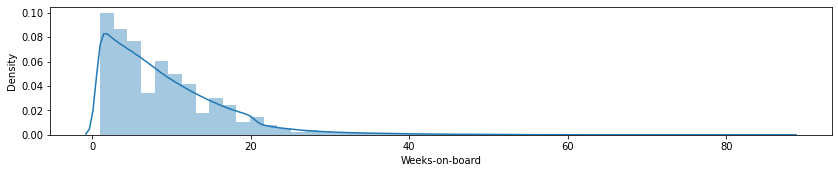

In [ ]:
# Check the distribution of the 'weeks-on-board' column
plt.figure(figsize=(14,8))
plt.subplot(3, 1, 1); sns.distplot(billboard['weeks-on-board'])
plt.xlabel('Weeks-on-board')